In [10]:
import tweepy
import dotenv
from dotenv import load_dotenv
import os

load_dotenv()

consumer_key= os.getenv('consumer_key')
consumer_secret= os.getenv('consumer_secret')
access_token= os.getenv('access_token')
access_secret= os.getenv('access_secret')
bearer_token1=os.getenv('bearer_token')

In [13]:
try:
    client = tweepy.Client(
        bearer_token=bearer_token1,
    )
    print('Authentication successful')
except:
    print('Broken')

Authentication successful


In [199]:
user_id = 25073877
tweets = client.get_users_mentions(user_id, user_auth=False, max_results=5)
print(tweets)
for tweet in tweets.data:
    print(tweet.text+"\n----- \n \n")

Response(data=[<Tweet id=1801727147121459365 text="@hinsonashley @realDonaldTrump What are you going to do on 5 Nov when he loses again\n\nPrincipled Americans don't vote for Rapists, Traitors &amp; Convicted Felons especially when it's all the same person\n\nReminder: https://t.co/Cn9q3UF9js">, <Tweet id=1801727146278404384 text='@IAPolls2022 @realDonaldTrump If Trump is even tied in MN, he should be up 5-6 in PA, 3-4 in MI and, 2-3 in WI'>, <Tweet id=1801727143736709361 text='@ByronDonalds @realDonaldTrump Byron what have you done in the last 4 years to help America and the people ? https://t.co/Xc3G4Yn597'>, <Tweet id=1801727142046142605 text='@SpeakerMcCarthy @realDonaldTrump What does he have on you? Pathetic'>, <Tweet id=1801727124719681952 text='@WarlordDilley @realDonaldTrump Trump is 78 and Disgusting House Republicans. Trump Is Not Well https://t.co/CrpAU4QQZs'>], includes={}, errors=[], meta={'next_token': '7140dibdnow9c7btw4azv9qgg5j4zif756bavrwbhvwvm', 'result_count': 5, '

In [198]:
tweets1 = client.search_recent_tweets("Chess", max_results=10)
for tweet in tweets1.data:
    print(tweet.text+"\n----- \n \n")

@TeresaWils43957 8563932 🧗‍♀️🇱🇨🌾☎️👳🏻‍♀️ He enjoys playing chess with his grandfather.
----- 
 

RT @BrainStorm_Joe: Who wants to bet that Q post number 1 proves true in the very near future. 

Hindsight is 20/20.  Listen closely to eve…
----- 
 

RT @PepeOnBase0x69: This is chess not checkers $PEPE https://t.co/omct8mUmnj
----- 
 

@errolbsk His people call him a chess player 😂
----- 
 

@Kasparov63 You have been and probably still are a good chess player but you’d play as you speak about politics you’d lose EVERY game. 
Playing chess on a chessboard and analyzing global political scenarios are TOTALLY different topics.
----- 
 

RT @Tumz_kby: What was MK’s plan mara? Maybe it’s chess, morabaraba or some other sport but I’m not seeing what exactly they are trying to…
----- 
 

@TeresaWils43957 He enjoys playing chess with his grandfather. 1316877 ✋🤬🍁
----- 
 

@goolammv Chess Pain 😭😭😭😭
----- 
 

RT @chesscom: Building the new LEGO 2-in-1 chess/checkers set! 

Sound up for ASMR 🔊😌 https

In [193]:
tweets2 = client.search_all_tweets("renewable energy",end_time=None, max_results=5, start_time=None,)
for tweet in tweets2.data:
    print(tweet.text+"\n----- \n \n")

Forbidden: 403 Forbidden
When authenticating requests to the Twitter API v2 endpoints, you must use keys and tokens from a Twitter developer App that is attached to a Project. You can create a project via the developer portal.

In [201]:
tweet_dict = {}

items=[]

for i, tweet in enumerate(tweets.data):
    tweet_dict[f'{i}'] = tweet.text
    
for key, value in tweet_dict.items():
    modified_key = key.replace('[i]', '')
    items.append((modified_key, value))

text = items[0]
tweet1=text[1]

print (tweet1)

@hinsonashley @realDonaldTrump What are you going to do on 5 Nov when he loses again

Principled Americans don't vote for Rapists, Traitors &amp; Convicted Felons especially when it's all the same person

Reminder: https://t.co/Cn9q3UF9js


In [202]:
from pysentimiento import create_analyzer

analyzer = create_analyzer(task="sentiment", lang="en")
AnalyzerOutput1=analyzer.predict(tweet1)

class AnalyzerOutput:
    def __init__(self, output, probas):
        self.output = output
        self.probas = probas

analyzer_output = AnalyzerOutput1

probas_dict = analyzer_output.probas

print(probas_dict)

{'NEG': 0.9746758341789246, 'NEU': 0.022630013525485992, 'POS': 0.0026941238902509212}


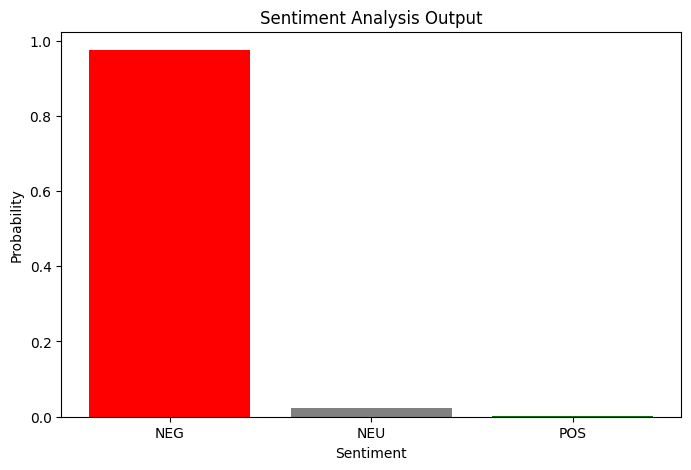

The tweet being analyzed is: 
"@hinsonashley @realDonaldTrump What are you going to do on 5 Nov when he loses again

Principled Americans don't vote for Rapists, Traitors &amp; Convicted Felons especially when it's all the same person

Reminder: https://t.co/Cn9q3UF9js"


In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(list(probas_dict.items()), columns=['Sentiment', 'Probability'])

colors = ['green' if sentiment == 'POS' else 'gray' if sentiment == 'NEU' else 'red' for sentiment in df['Sentiment']]

plt.figure(figsize=(8, 5))
plt.bar(df['Sentiment'], df['Probability'], color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Probability')
plt.title('Sentiment Analysis Output')
plt.show()

print("The tweet being analyzed is: \n" +'"' +tweet1 +'"')
plt.show()